In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [3]:
all_tracklets = project_data.df_all_tracklets

In [4]:
track_cfg = project_data.project_config.get_tracking_config()
fname = track_cfg.resolve_relative_path_from_config('final_3d_tracks_df')

df_tracks = pd.read_hdf(fname)
df_tracks.replace(0.0, np.nan, inplace=True)

In [5]:
# From different project, but same templates
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/postprocessing/leifer_tracks.h5"
df_leifer = pd.read_hdf(fname)
df_leifer.replace(0.0, np.nan, inplace=True)

# Look at tracklet with known ID (leifer of course has gaps) but unmatched

In [51]:
candidate1 = 'neuron_005'
tracklet_candidate = 'neuron9010'

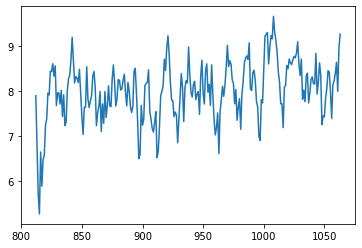

In [52]:
this_tracklet = all_tracklets[tracklet_candidate]
this_tracklet['z'].plot()

In [53]:
t1 = df_leifer[candidate1]


In [54]:
def calc_all_dist(df1, df2):
    # Check if they are same neuron, i.e. right on top of each other
    df1.replace(0.0, np.nan, inplace=True)
    df2.replace(0.0, np.nan, inplace=True)
    df_norm = np.sqrt(np.square(df1 - df2).sum(axis=1, min_count=1))

    return df_norm.to_numpy()

In [55]:
d1 = calc_all_dist(this_tracklet, t1)

Text(0.5, 1.0, 'Distance between a good tracklet and leifer candidate')

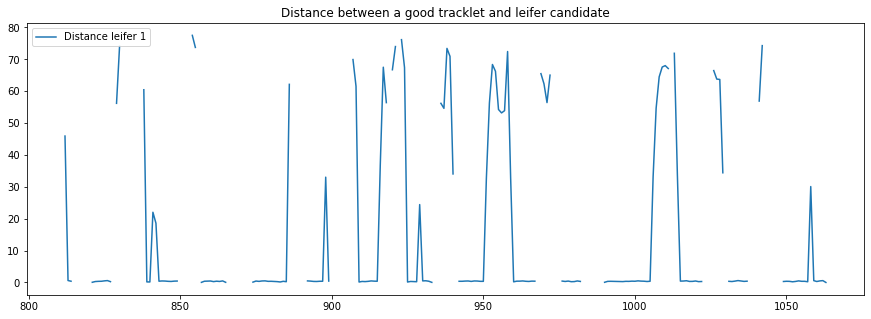

In [56]:
plt.figure(figsize=(15,5))
plt.plot(d1, label="Distance leifer 1")
plt.legend()
plt.title("Distance between a good tracklet and leifer candidate")

In [57]:
tol = 2.0

d1_outlier = (d1 < tol).astype(float)
d1_outlier[np.isnan(d1)] = np.NaN

conf = t1['likelihood'].copy()
conf[np.isnan(d1)] = np.NaN

Text(0.5, 1.0, 'Is an inlier (high is good)')

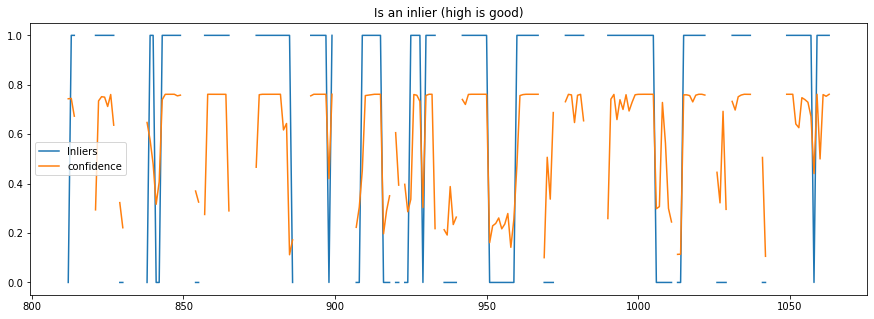

In [58]:
plt.figure(figsize=(15,5))
plt.plot(d1_outlier, label="Inliers")
plt.plot(conf, label='confidence')
plt.legend()
plt.title("Is an inlier (high is good)")

Text(0.5, 1.0, 'Is an inlier (high is good)')

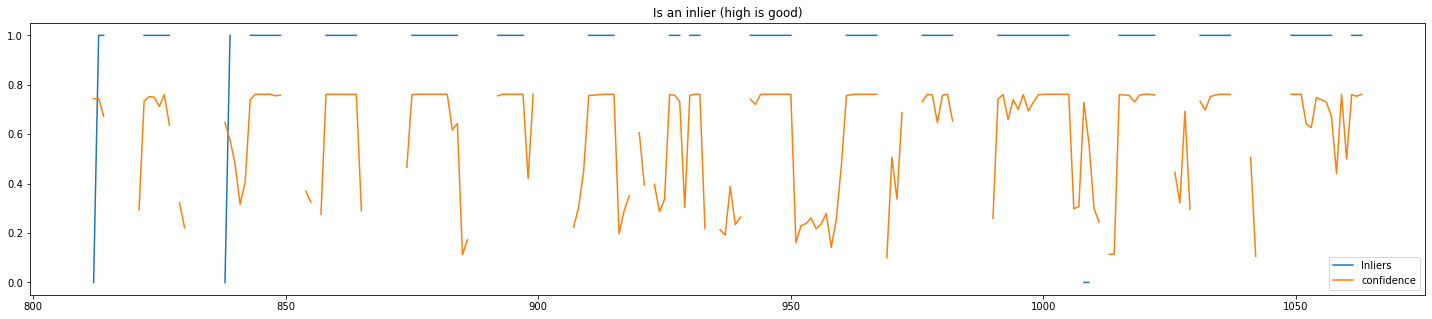

In [59]:
to_nan = conf < 0.5
d1_outlier[to_nan] = np.nan

plt.figure(figsize=(25,5))
plt.plot(d1_outlier, label="Inliers")
plt.plot(conf, label='confidence')
plt.legend()
plt.title("Is an inlier (high is good)")

# Another tracklet, same neuron

In [46]:
tracklet_candidate = 'neuron1672'
this_tracklet = all_tracklets[tracklet_candidate]
t1 = df_leifer[candidate1]

d1 = calc_all_dist(this_tracklet, t1)

tol = 2.0

d1_outlier = (d1 < tol).astype(float)
d1_outlier[np.isnan(d1)] = np.NaN

conf = t1['likelihood'].copy()
conf[np.isnan(d1)] = np.NaN

Text(0.5, 1.0, 'Is an inlier (high is good)')

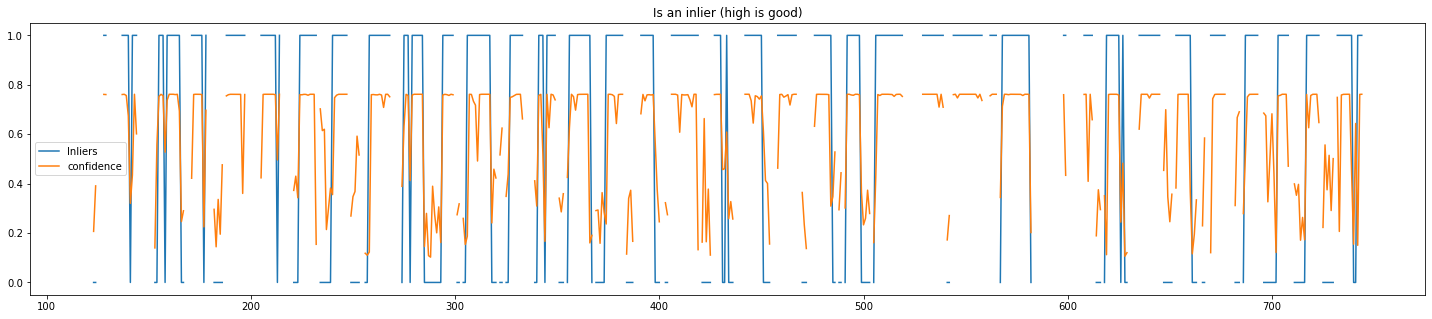

In [49]:
plt.figure(figsize=(25,5))
plt.plot(d1_outlier, label="Inliers")
plt.plot(conf, label='confidence')
plt.legend()
plt.title("Is an inlier (high is good)")

Text(0.5, 1.0, 'Is an inlier (high is good)')

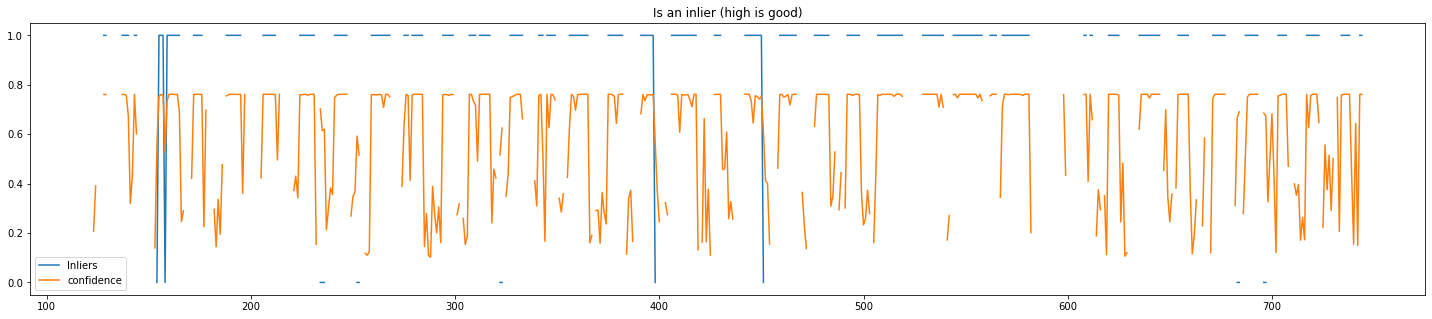

In [50]:
to_nan = conf < 0.5
d1_outlier[to_nan] = np.nan

plt.figure(figsize=(25,5))
plt.plot(d1_outlier, label="Inliers")
plt.plot(conf, label='confidence')
plt.legend()
plt.title("Is an inlier (high is good)")

# Another tracklet, different neuron, has a break-point

In [60]:
candidate1 = 'neuron_044'
tracklet_candidate = 'neuron1479'
this_tracklet = all_tracklets[tracklet_candidate]
t1 = df_leifer[candidate1]

d1 = calc_all_dist(this_tracklet, t1)

tol = 2.0

d1_outlier = (d1 < tol).astype(float)
d1_outlier[np.isnan(d1)] = np.NaN

conf = t1['likelihood'].copy()
conf[np.isnan(d1)] = np.NaN

Text(0.5, 1.0, 'Is an inlier (high is good)')

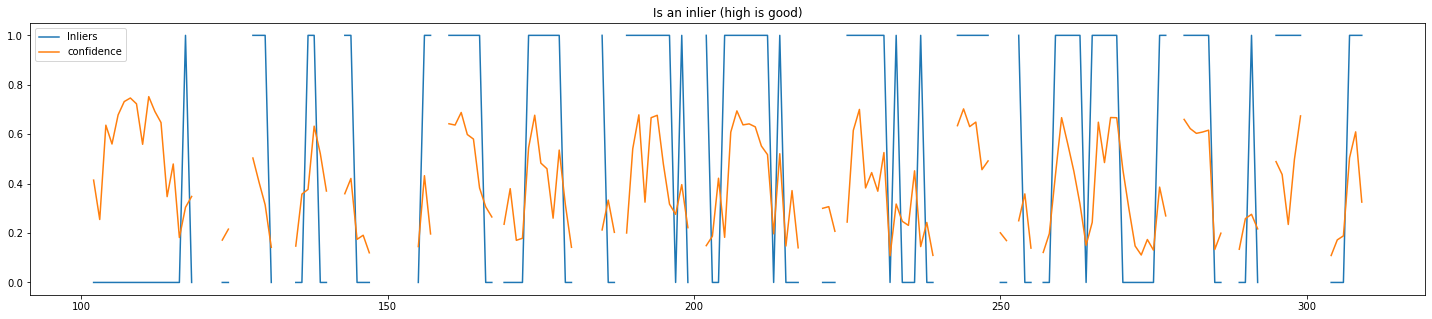

In [61]:
plt.figure(figsize=(25,5))
plt.plot(d1_outlier, label="Inliers")
plt.plot(conf, label='confidence')
plt.legend()
plt.title("Is an inlier (high is good)")

Text(0.5, 1.0, 'Is an inlier (high is good)')

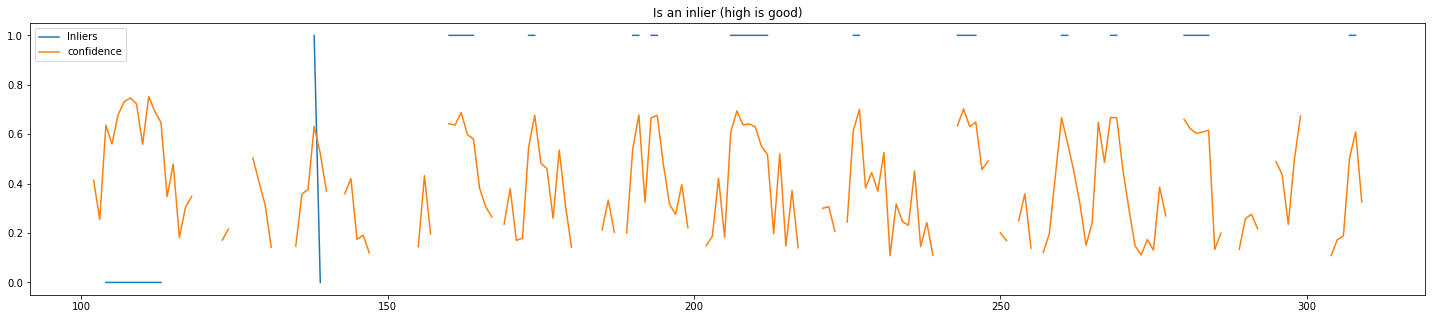

In [62]:
to_nan = conf < 0.5
d1_outlier[to_nan] = np.nan

plt.figure(figsize=(25,5))
plt.plot(d1_outlier, label="Inliers")
plt.plot(conf, label='confidence')
plt.legend()
plt.title("Is an inlier (high is good)")

In [67]:
import ruptures as rpt

# Check the automatic splitting algorithm
signal = d1_outlier[100:330]
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)

algo.single_bkp(0, 250), algo.predict(n_bkps=1)

((5, nan), [5, 230])

# Scratch for breakpoints

In [64]:
import ruptures as rpt

# Check the automatic splitting algorithm
signal = d1[800:1100] > tol
# true_bkps = [split_point[0] - 310]

model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)

algo.single_bkp(0, 500)

(295, 0.0)